<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
EDA, Regression Results, and Plots saved successfully.


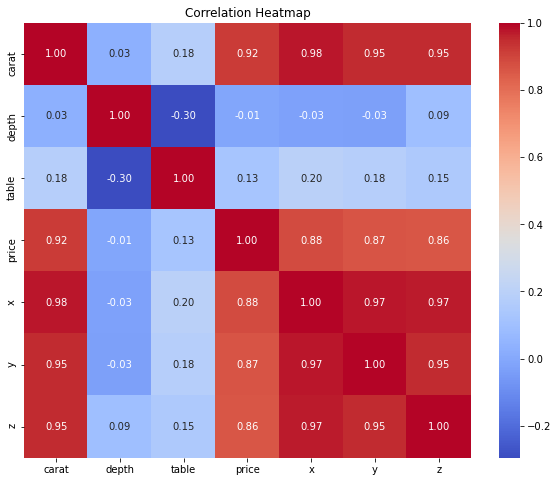

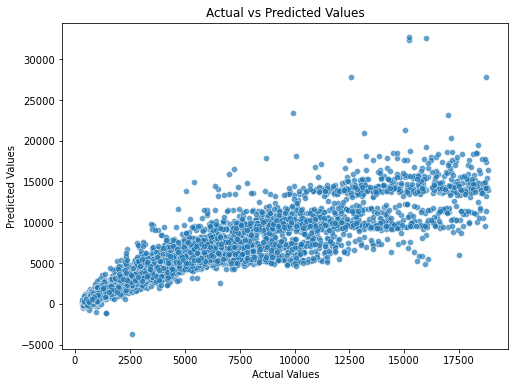

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to download and process a CSV file from URL
def load_data(url):
    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# URL of the dataset (replace this with any dataset URL you want)
dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

# Load the dataset
data = load_data(dataset_url)
if data is None:
    raise ValueError("Could not load data. Please check the URL.")

# Perform Exploratory Data Analysis (EDA)
# Perform Exploratory Data Analysis (EDA)
def perform_eda(df):
    eda_results = []
    eda_results.append("# Exploratory Data Analysis\n")
    eda_results.append(f"Dataset Shape: {df.shape}\n")
    eda_results.append(f"Dataset Info:\n{df.info()}\n")
    eda_results.append(f"Summary Statistics:\n{df.describe()}\n")

    # Check for missing values
    missing_values = df.isnull().sum()
    eda_results.append(f"Missing Values:\n{missing_values}\n")

    # Correlation Matrix - Calculate only for numeric columns
    # Select only numeric features for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()
    eda_results.append(f"Correlation Matrix:\n{correlation_matrix}\n")

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.savefig("correlation_heatmap.png")

    return "\n".join(eda_results)
# Select relevant columns for regression (e.g., numeric columns only)
numeric_data = data.select_dtypes(include=[np.number])

# Define features (X) and target (y)
X = numeric_data.drop(columns=['price'], errors='ignore')
y = numeric_data['price'] if 'price' in numeric_data.columns else numeric_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save results and interpretations to a text file
with open("linear_regression_results.txt", "w") as f:
    # EDA Results
    f.write(perform_eda(data))

    # Regression Results
    f.write("\n# Linear Regression Results\n")
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"R-squared Score: {r2}\n")

    # Model Coefficients
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    f.write(f"Model Coefficients:\n{coefficients}\n")

# Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.savefig("actual_vs_predicted.png")

print("EDA, Regression Results, and Plots saved successfully.")